<a href="https://colab.research.google.com/github/yudahendriawan/google-colab-projects/blob/main/image_classification_of_dog_emotion_with_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount your Google Drive to /content/drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/DATA7703/datasets2.0/merger_dataset"

angry  happy  labels.csv  relaxed  sad


In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
batch_size = 32
img_height = 64
img_width = 64

path = "/content/drive/My Drive/DATA7703/datasets2.0/merger_dataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=42,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 19925 files belonging to 4 classes.
Using 15940 files for training.
Found 19925 files belonging to 4 classes.
Using 3985 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['angry', 'happy', 'relaxed', 'sad']


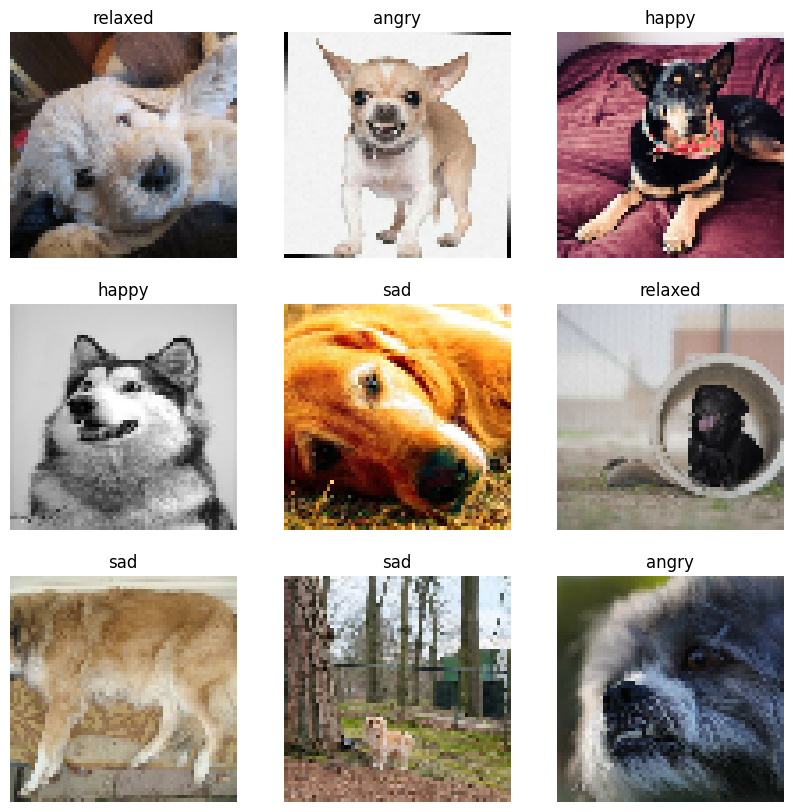

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 4

data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
    tf.keras.layers.GaussianNoise(0.1)
  ]
)

input_shape = (img_height, img_width, 3)

model = tf.keras.Sequential([
  normalization_layer,
  data_augmentation,
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation="relu"),
    tf.keras.layers.Dense(num_classes, activation="relu"),
  tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
  metrics=['accuracy'])

In [ ]:
epochs = 10
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
499/499 [==============================] - 2016s 4s/step - loss: 1.3628 - accuracy: 0.3051 - val_loss: 1.3500 - val_accuracy: 0.3077
Epoch 2/10
499/499 [==============================] - 91s 182ms/step - loss: 1.3480 - accuracy: 0.3316 - val_loss: 1.3568 - val_accuracy: 0.3099
Epoch 3/10
499/499 [==============================] - 91s 183ms/step - loss: 1.3423 - accuracy: 0.3432 - val_loss: 1.3436 - val_accuracy: 0.3425
Epoch 4/10
499/499 [==============================] - 92s 184ms/step - loss: 1.3323 - accuracy: 0.3621 - val_loss: 1.3343 - val_accuracy: 0.3634
Epoch 5/10
499/499 [==============================] - 92s 185ms/step - loss: 1.3226 - accuracy: 0.3699 - val_loss: 1.3154 - val_accuracy: 0.3877
Epoch 6/10
499/499 [==============================] - 92s 185ms/step - loss: 1.3150 - accuracy: 0.3799 - val_loss: 1.2957 - val_accuracy: 0.4048
Epoch 7/10
499/499 [==============================] - 89s 179ms/step - loss: 1.3044 - accuracy: 0.3849 - val_loss: 1.2912 - val_acc

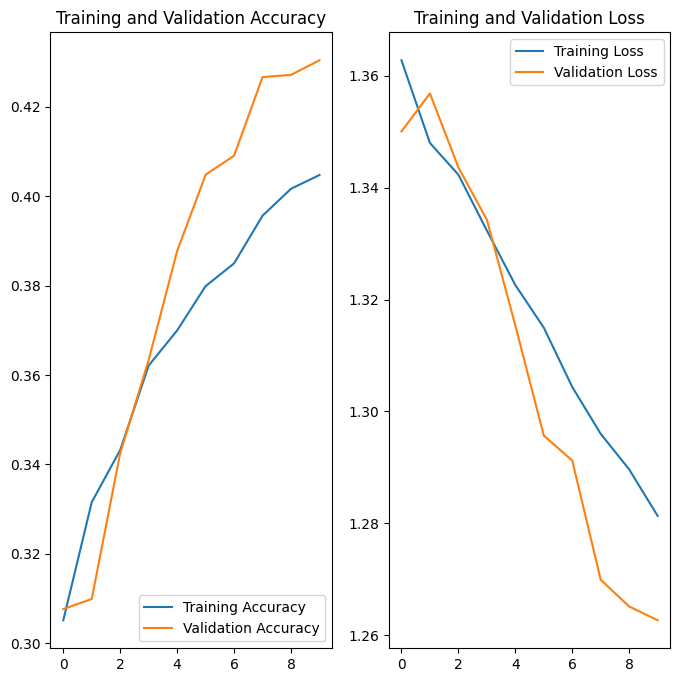

In [ ]:
acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']

loss = model.history.history['loss']
val_loss = model.history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()